In [1]:
# Imports básicos

import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor

%matplotlib inline

In [2]:
# Carrega o dataset a partir do scikit
from sklearn import datasets

iris = datasets.load_iris()


# Transforma o dataset em um DataFrame Pandas
df_iris = pd.DataFrame(iris.data)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = iris.target

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Prepara os dados para o treinamento e previsão
X = df_iris.drop(['target'], axis=1)
y = df_iris['target']


In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    
    # Hiperparâmetros: devem ser ajustados para cada dataset/problema, 
    # manualmente (intuição) ou por técnicas automatizadas.
    # Ver: https://scikit-learn.org/stable/modules/grid_search.html
    
    max_depth=5,
    criterion='entropy',
    random_state=1
)

# Treina o modelo
model.fit(
    X, y
)

# Prevê os próprios dados do treinamento (não usar isso no mundo real)
print('.predict(X):\n')
print(model.predict(X))

# Prevê a probabilidade de cada entrada em relação a cada classe com os 
# próprios dados do treinamento (não usar isso no mundo real)
print('\n\n.predict_proba(X):')
model.predict_proba(X)

.predict(X):

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


.predict_proba(X):


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

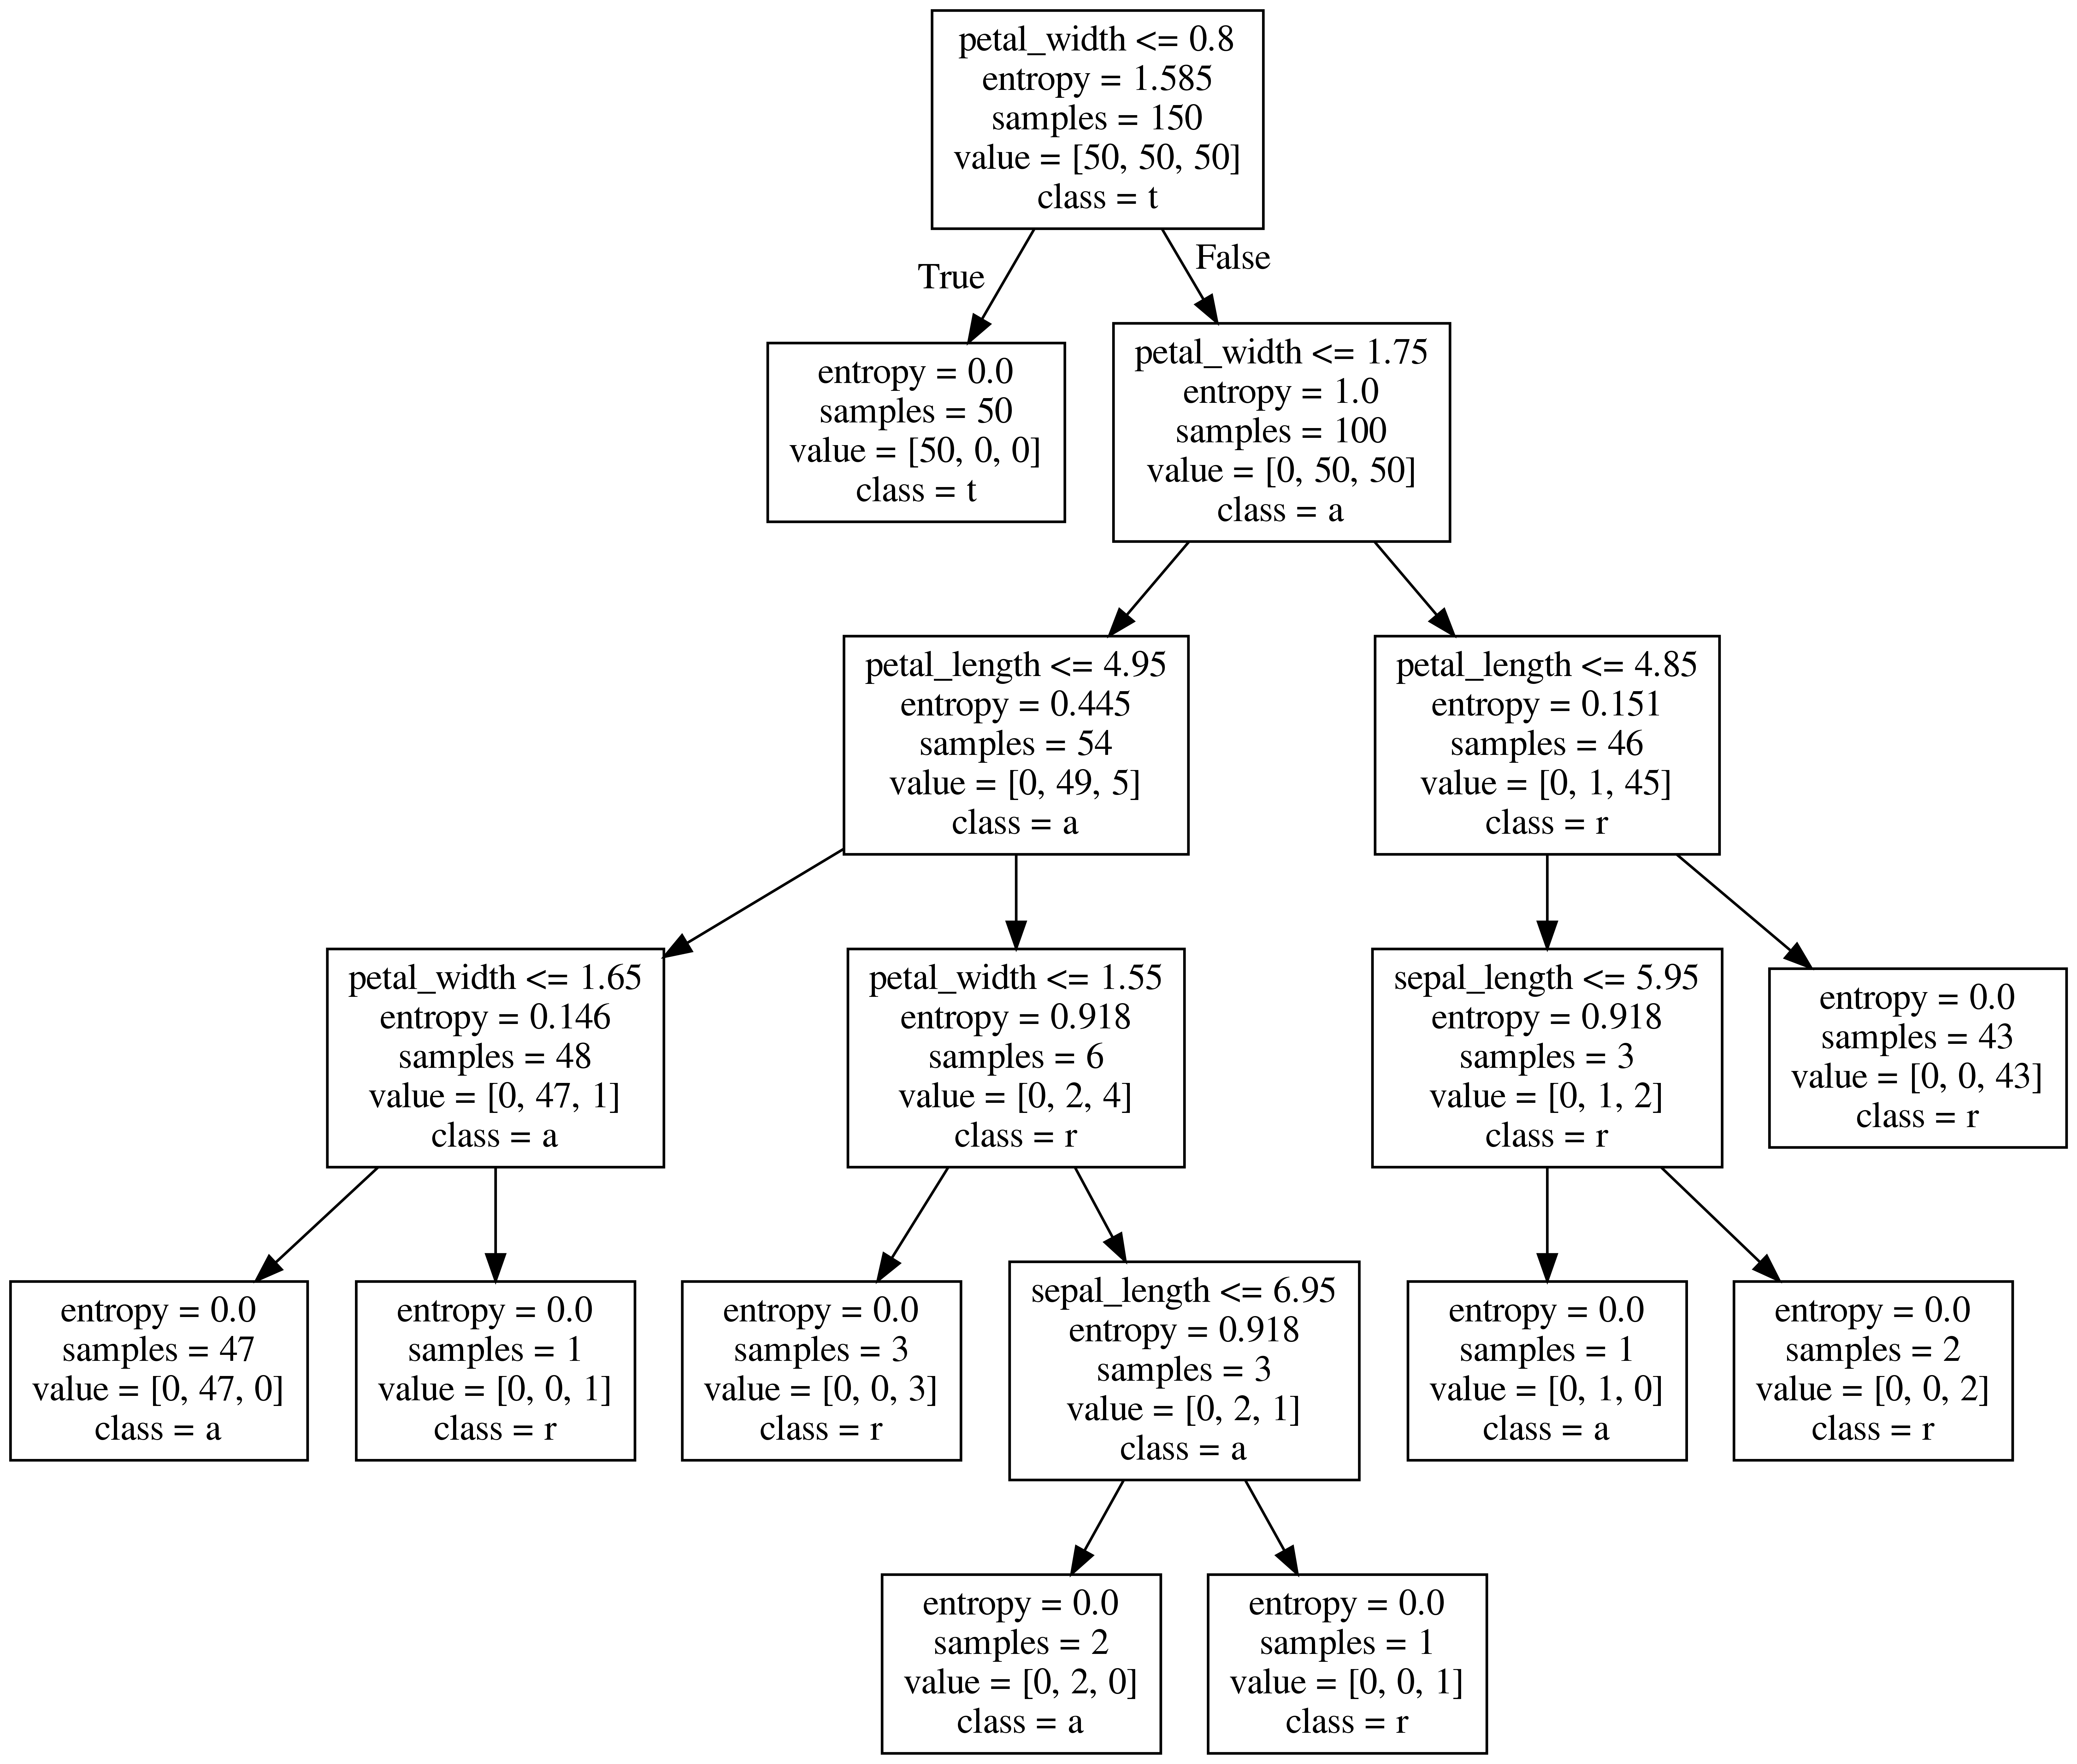

In [5]:
# Visualiza a árvore gerada
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

export_graphviz(
    model, 
    out_file='./img/tree.dot', 
    feature_names=X.columns,
    class_names='target'
)

call(['dot', '-Tpng', './img/tree.dot', '-o', './img/tree.png', '-Gdpi=600'])
Image(filename='./img/tree.png')

In [6]:
X_regressao = df_iris.drop(['target', 'petal_length'], axis=1)
y_regressao = df_iris['petal_length']

In [7]:
from sklearn.tree import DecisionTreeRegressor

model_regressao = DecisionTreeRegressor(
    max_depth=4,
    criterion='mse', # mean squared error
    random_state=1
)

# Treina o modelo
model_regressao.fit(
    X_regressao, y_regressao
)

# Prevê os próprios dados do treinamento (não usar isso no mundo real)
print('.predict(X):\n')
print(model_regressao.predict(X_regressao))

.predict(X):

[1.48064516 1.48064516 1.48064516 1.37142857 1.48064516 1.5
 1.37142857 1.48064516 1.37142857 1.48064516 1.48064516 1.48064516
 1.48064516 1.1        1.2        1.5        1.5        1.48064516
 1.48064516 1.48064516 1.48064516 1.66       1.         1.66
 1.48064516 1.48064516 1.66       1.48064516 1.48064516 1.48064516
 1.48064516 1.5        1.48064516 1.48064516 1.48064516 1.48064516
 1.48064516 1.48064516 1.37142857 1.48064516 1.48064516 1.37142857
 1.37142857 1.66       1.66       1.48064516 1.48064516 1.37142857
 1.48064516 1.48064516 4.74375    4.74375    4.74375    4.06190476
 4.74375    4.06190476 5.05217391 3.275      4.32857143 4.06190476
 3.275      4.06190476 4.32857143 4.74375    4.06190476 4.74375
 4.06190476 4.06190476 4.74375    4.06190476 5.05217391 4.32857143
 4.74375    4.32857143 4.32857143 4.74375    4.74375    5.05217391
 4.74375    4.06190476 4.06190476 4.06190476 4.06190476 5.05217391
 4.06190476 5.05217391 4.74375    4.32857143 4.06190476 4.061904

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.14, 
    random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

NameError: name 'train_test_split' is not defined

In [10]:
# Treina o modelo com X_train e prevê para X_test
model = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=2
)

model.fit(
    X_train, y_train
)

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [11]:
# Avalia com a métrica de acurácia (não funciona bem para targets desbalanceados)
metrics.accuracy_score(
    y_test, # Valor esperado
    y_pred # Valor previsto
)

1.0

In [12]:
# Avalia com a métrica f1-score (normaliza a quantidade de erros e acertos)
metrics.f1_score(
    y_test, 
    y_pred, 
    average=None # Para múltiplas classes
)

array([1., 1., 1.])

Matriz de confusão:
 [[ 8  0  0]
 [ 0 10  0]
 [ 0  0  4]]


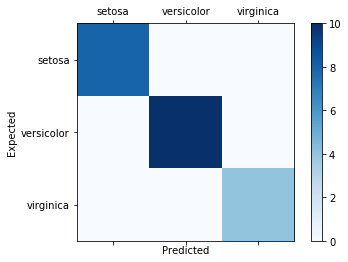

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de confusão:\n', conf_mat)

labels = iris.target_names.tolist()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X,
    y, 
    cv=50,
    scoring='accuracy',
    n_jobs=-1
)

print('Score de cada fold', scores)
print('Acurácia média:', np.mean(scores))
print('Desvio padrão:', np.std(scores))

Score de cada fold [1.         1.         1.         1.         1.         1.
 0.66666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.66666667 0.66666667 1.         1.         1.
 1.         1.         0.66666667 0.66666667 1.         1.
 1.         1.         1.         0.66666667 1.         1.
 1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Acurácia média: 0.9533333333333335
Desvio padrão: 0.11566234381931648


In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier(
    max_depth=4,
    n_estimators=25,
    n_jobs=-1,
    random_state=1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [16]:
train = pd.read_csv('./santander/train.csv')
test = pd.read_csv('./santander/test.csv')

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
# Nome das features
labels = train.columns.drop(['ID', 'TARGET']).tolist()

In [18]:
# Modelo
m = XGBClassifier(
    n_jobs=4,
    random_state=1
)

In [ ]:
# Validação local
np.mean(
    cross_val_score(
        m,
        train[labels],
        train['TARGET'],
        cv=3,
        scoring='roc_auc'
    )
)

0.8366787931523726

In [ ]:
# Gerando a previsão para o arquivo de teste
m.fit(
    train[labels],
    train['TARGET']
)

pred = m.predict_proba(test[labels])[:,1]

In [ ]:
from sklearn.svm import SVC, SVR

model = SVC(
    kernel='rbf',
    C=1.0, # Parâmetro de penalidade de erro
    random_state=1
)

model.fit(
    train[labels],
    train['TARGET']
)

pred = model.predict_proba(test[labels])[:,1]

/root/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
df_submission = pd.read_csv('./santander/sample_submission.csv')
df_submission['TARGET'] = pred
df_submission.to_csv('submission.csv', index=False)

df_submission.head()